# Surface visualization examples

These examples demonstrate how to visualize surfaces generated by laMEG, as well as data projected onto them.

In [1]:
import numpy as np
import k3d
from lameg.surf import LayerSurfaceSet
from lameg.viz import color_map, show_surface
from IPython.display import Image
import base64

In [2]:
%env SUBJECTS_DIR=../test_data/fs

env: SUBJECTS_DIR=../test_data/fs


In [4]:
# Visualize the inflated cortical surface for a single subject with
# no data overlay
surf_set = LayerSurfaceSet('sub-104', 11)
plot = show_surface(
    surf_set,
    info=True
)

Output()

51091 vertices


In [5]:
plot.fetch_screenshot()

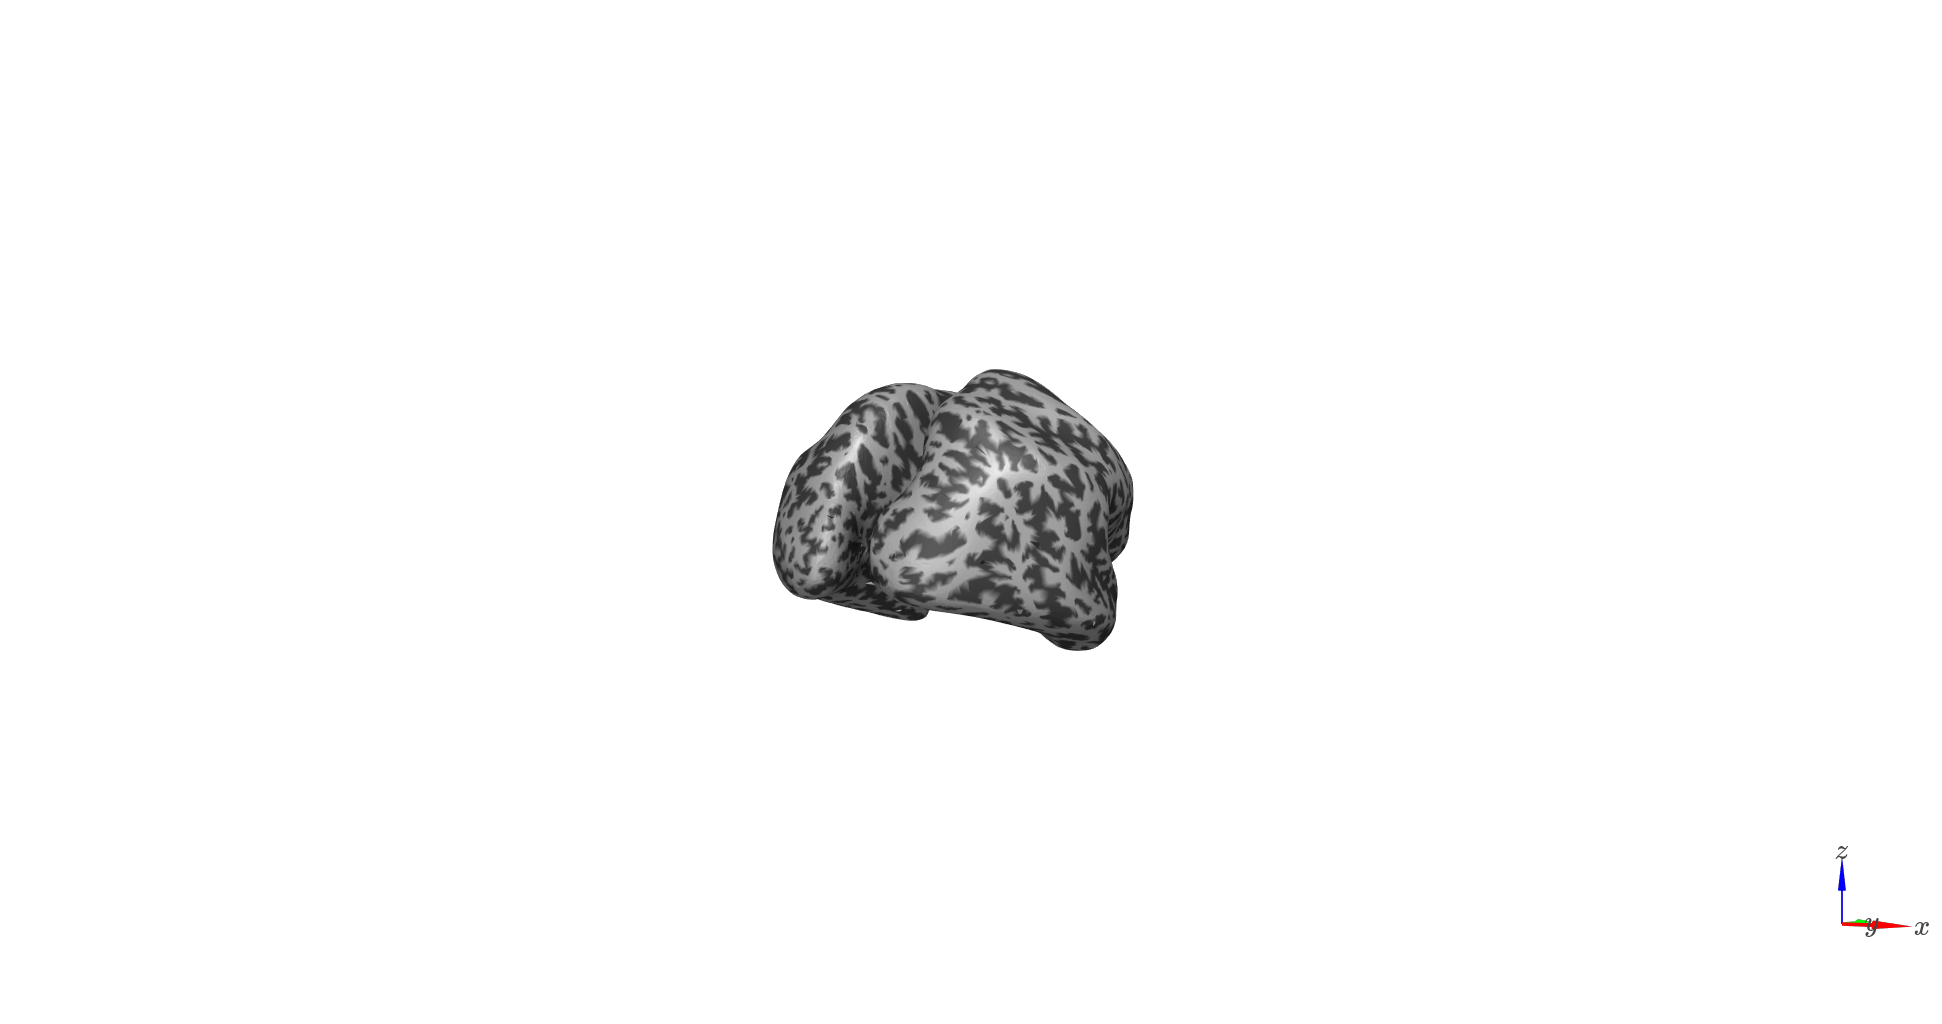

In [6]:
Image(data=base64.b64decode(plot.screenshot))

In [12]:
# We can turn off curvature plotting
surf_set = LayerSurfaceSet('sub-104', 11)
plot = show_surface(
    surf_set, 
    plot_curvature=False,
    info=True
)

Output()

51091 vertices


In [13]:
plot.fetch_screenshot()

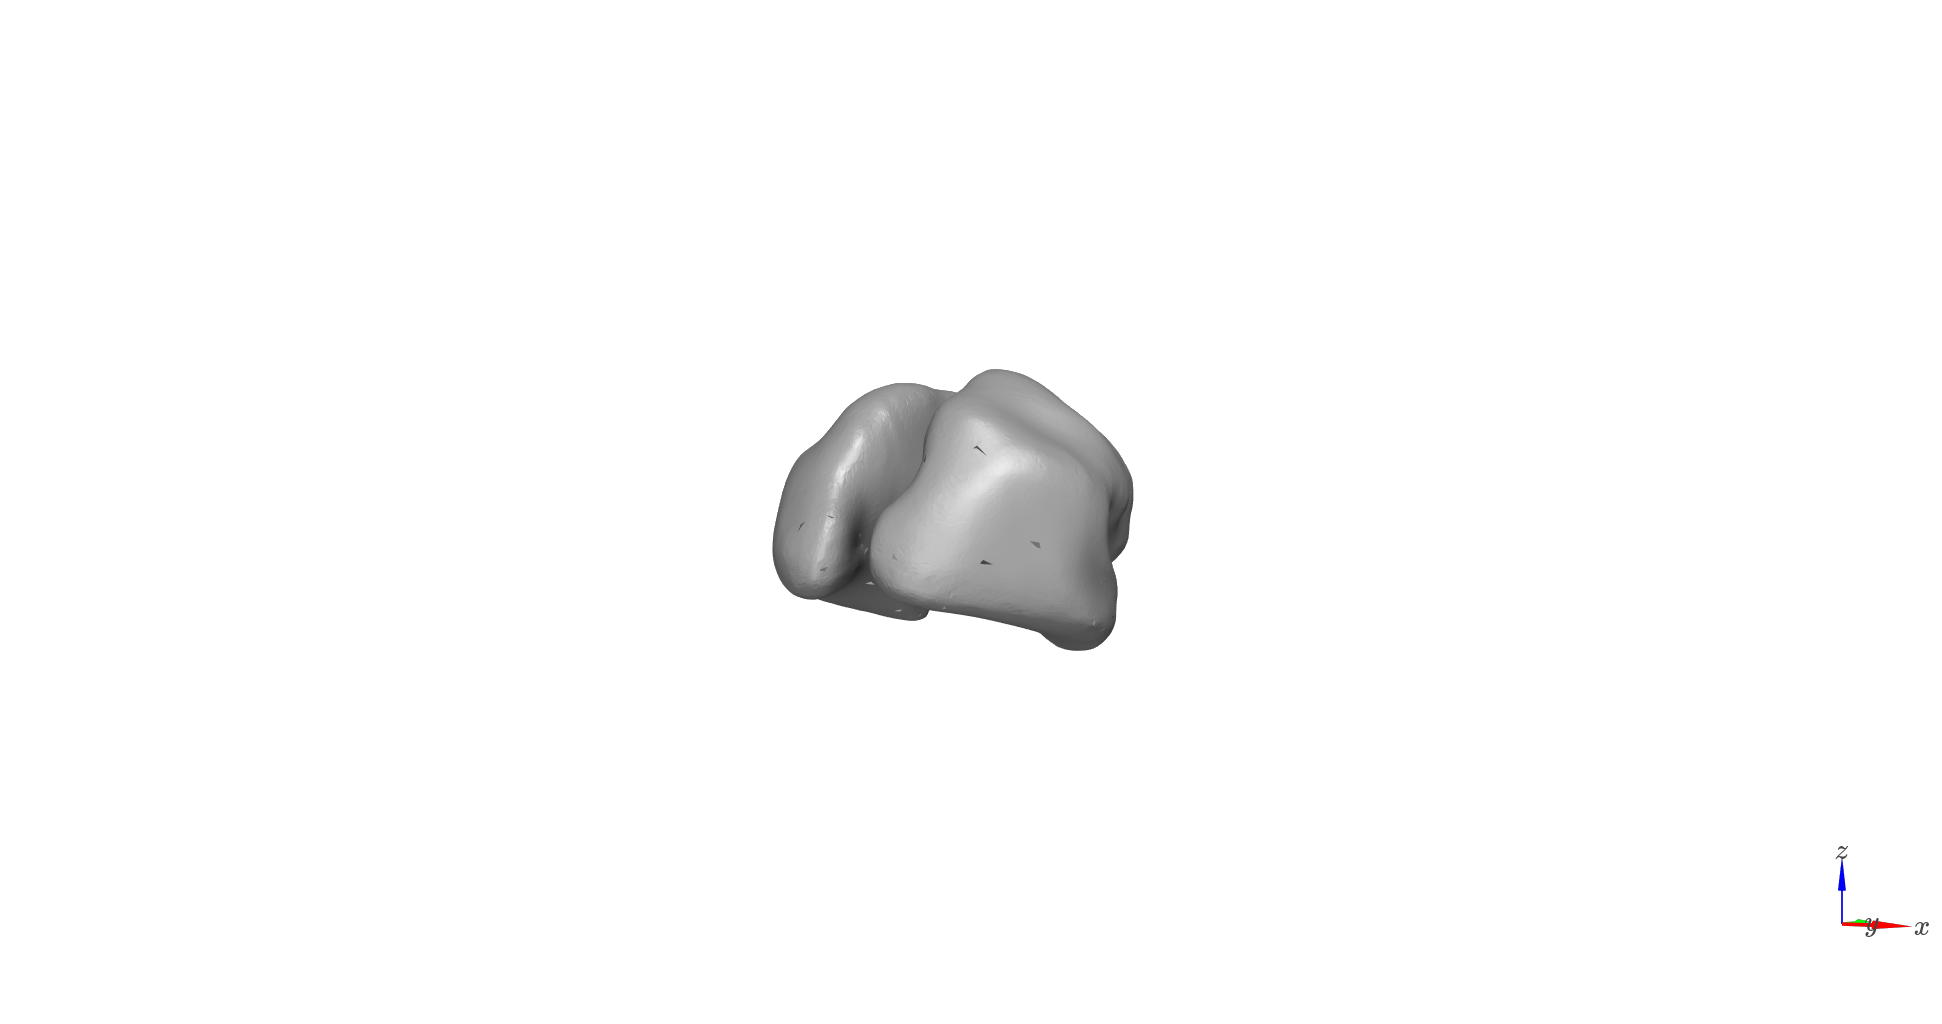

In [14]:
Image(data=base64.b64decode(plot.screenshot))

In [28]:
# Visualize the inflated cortical surface for a single subject with
# random data overlaid on it
surface = surf_set.load(layer_name='inflated', stage='ds')
vertices, _, *_ = surface.agg_data()
n_verts=vertices.shape[0]

# Generate random data
data = np.random.randint(-1000, 1000, n_verts)

# Get vertex colors using RdYlBu_r colormap. c_map (matplotlib.colors.Colormap) is 
# returned as well for plotting a colorbar
v_colors, c_map = color_map(
    data, 
    "RdYlBu_r", 
    data.min(), 
    data.max()
)
plot = show_surface(
    surf_set, 
    vertex_colors=v_colors, 
    info=True
)

Output()

51091 vertices


In [29]:
plot.fetch_screenshot()

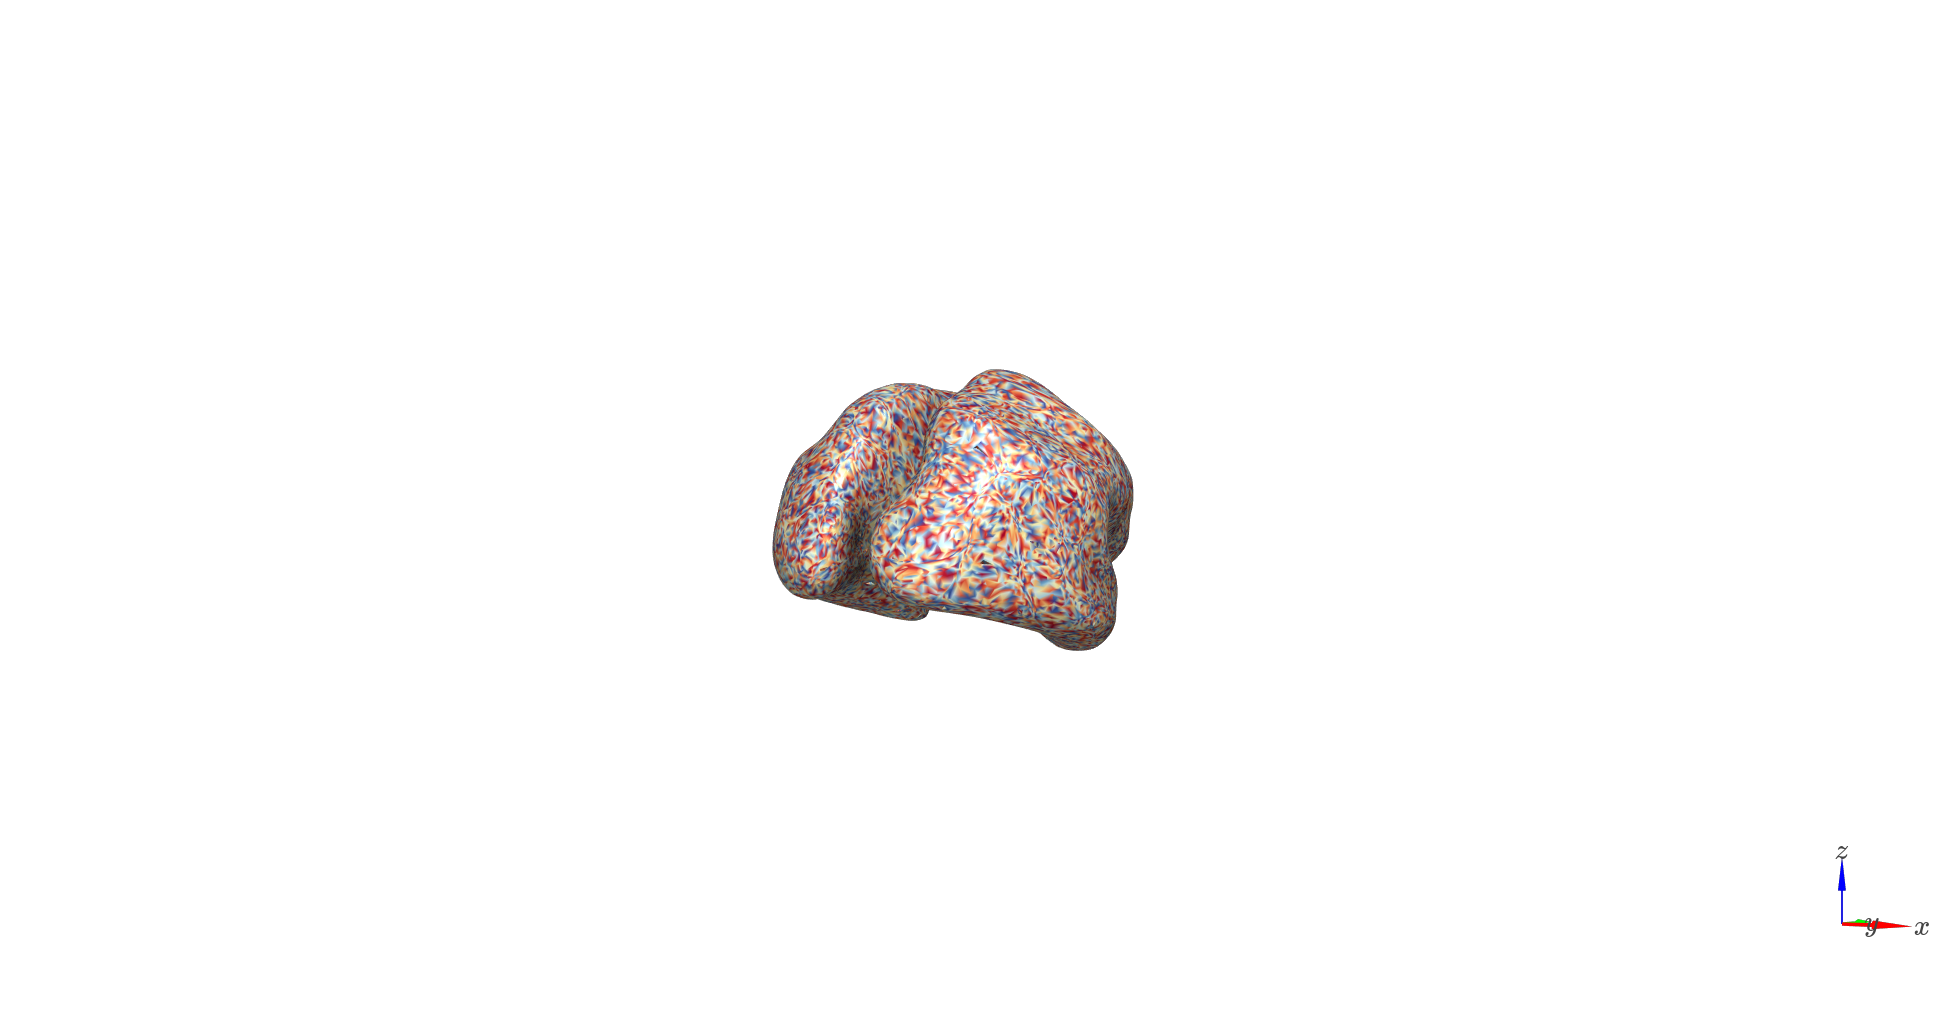

In [30]:
Image(data=base64.b64decode(plot.screenshot))

In [37]:
# We can add an alpha channel to the color data and set portions
# of the surface data to be transparent
v_colors2 = np.zeros((v_colors.shape[0],4))
v_colors2[:,:3]=v_colors
v_colors2[:20000,-1]=255
plot = show_surface(
    surf_set, 
    vertex_colors=v_colors2, 
    info=True
)

Output()

51091 vertices


In [38]:
plot.fetch_screenshot()

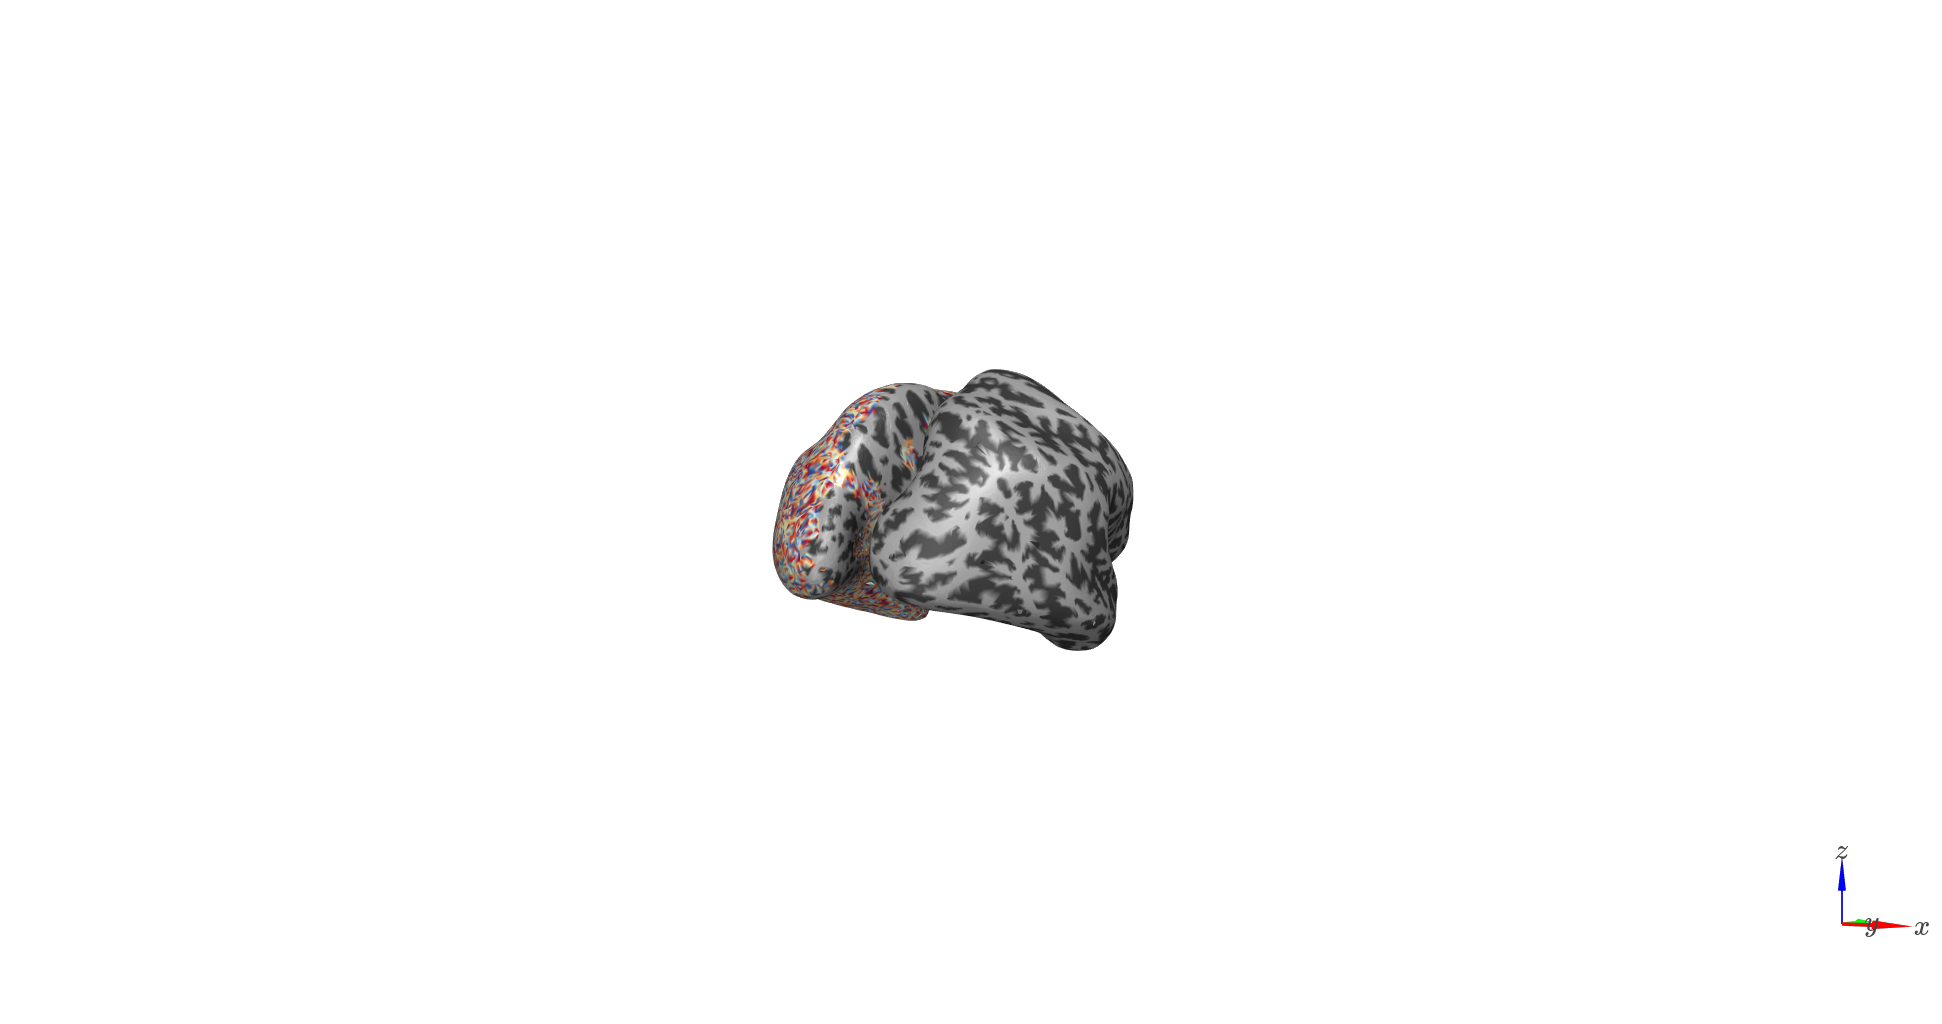

In [39]:
Image(data=base64.b64decode(plot.screenshot))

In [40]:
# We can specify a different layer_name (e.g. 'white') and processing
# stage (e.g. 'converted') and hemisphere
surface = surf_set.load(layer_name='white', stage='converted', hemi='lh')
vertices, _, *_ = surface.agg_data()
n_verts=vertices.shape[0]

data = np.random.randint(-1000, 1000, n_verts)

v_colors, c_map = color_map(
    data, 
    "RdYlBu_r", 
    data.min(), 
    data.max()
)
plot = show_surface(
    surf_set, 
    layer_name='white',
    stage='converted',
    hemi='lh',
    vertex_colors=v_colors, 
    info=True
)

Output()

265950 vertices


In [41]:
plot.fetch_screenshot()

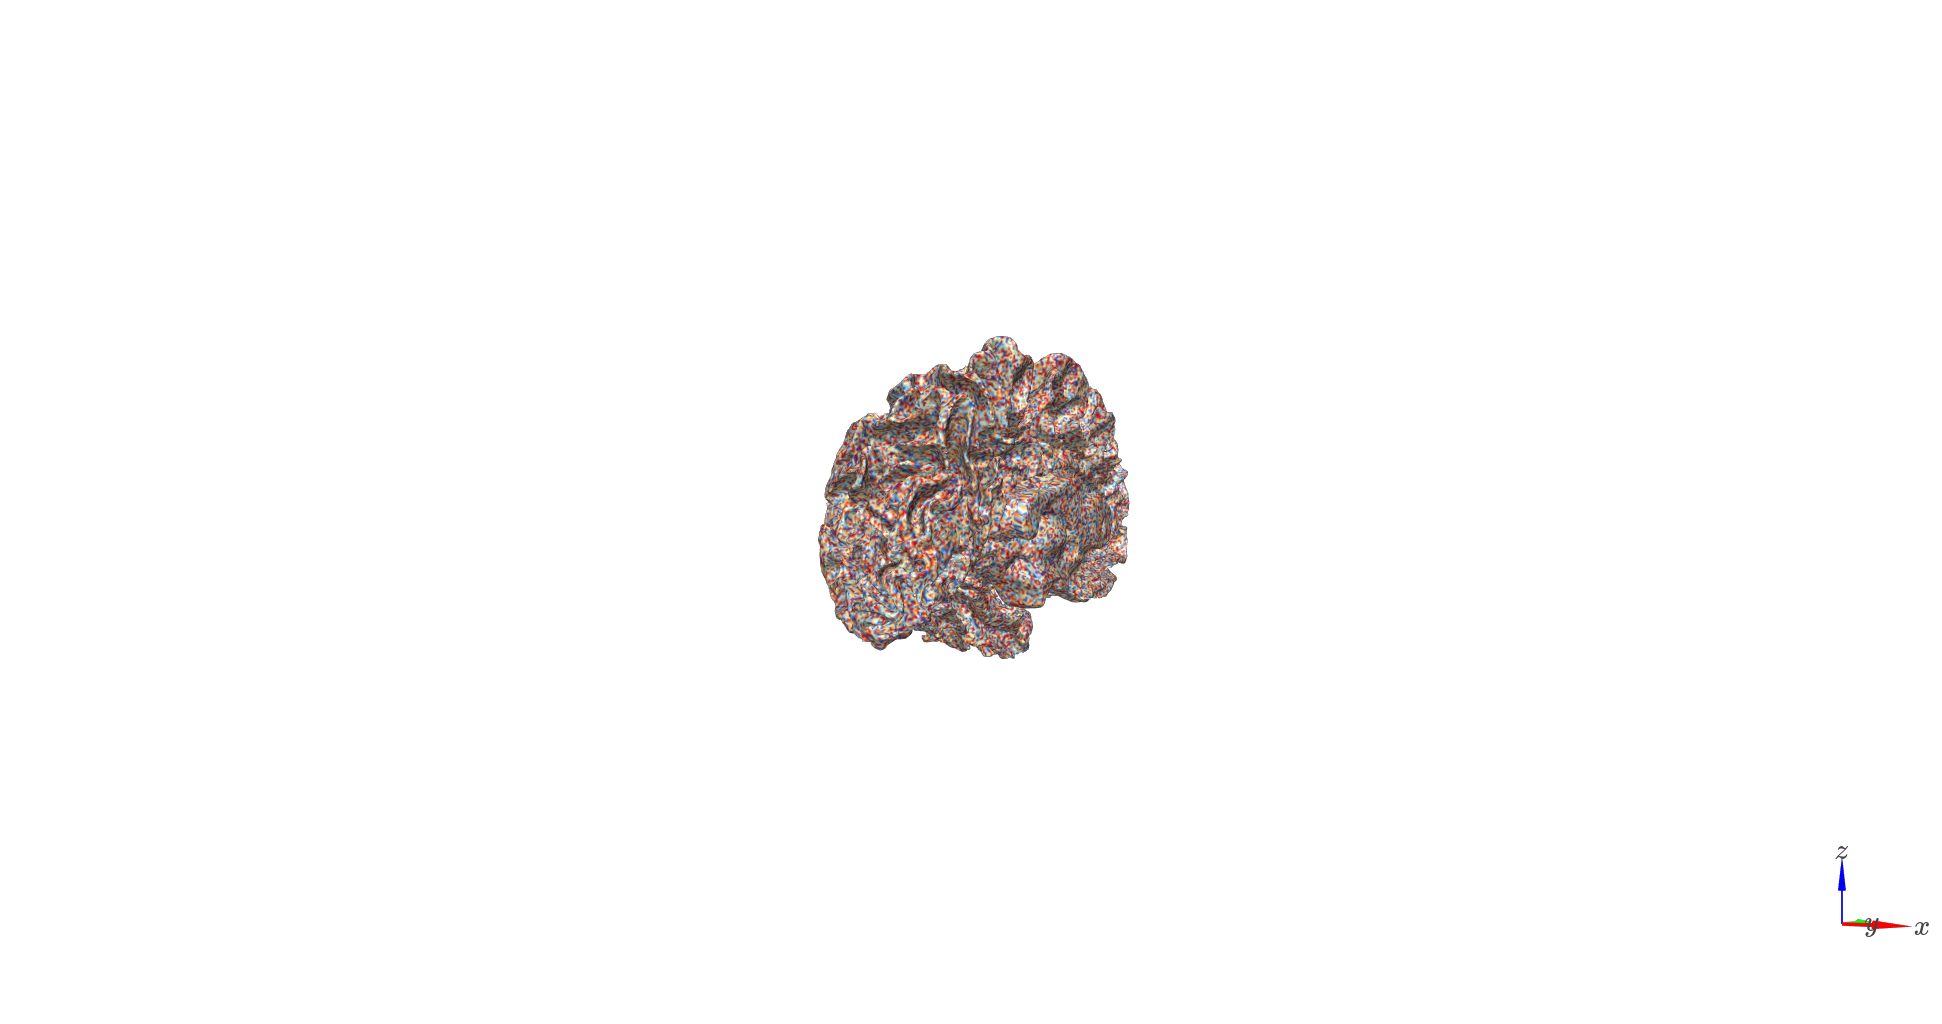

In [42]:
Image(data=base64.b64decode(plot.screenshot))

In [43]:
# Finally we can interpolate data defined on a downsampled surface for
# display on a full resolution surface
interp_data=surf_set.interpolate_layer_data(
    'white', 
    data, 
    from_stage='ds', 
    to_stage='combined')

v_colors, c_map = color_map(
    interp_data, 
    "RdYlBu_r", 
    interp_data.min(), 
    interp_data.max()
)
plot = show_surface(
    surf_set, 
    layer_name='white',
    stage='combined',
    vertex_colors=v_colors, 
    info=True
)

Output()

507832 vertices


In [44]:
plot.fetch_screenshot()

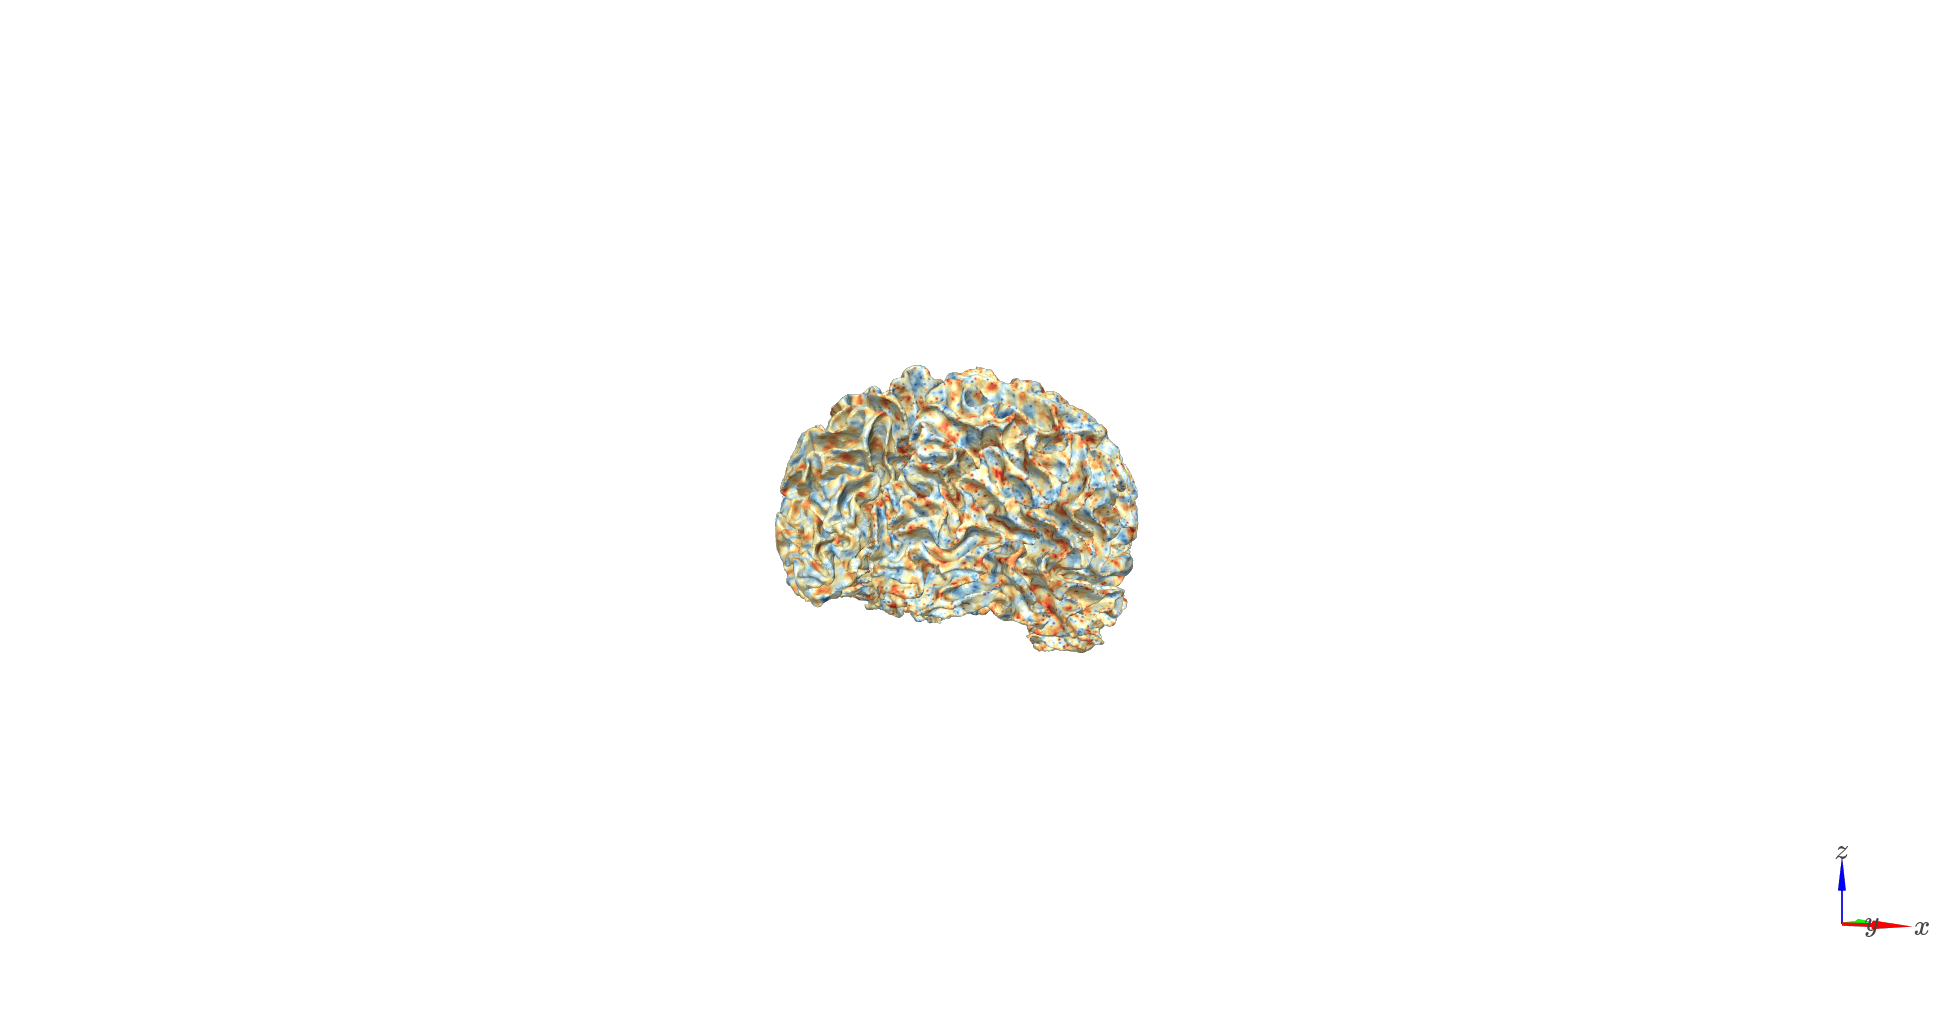

In [45]:
Image(data=base64.b64decode(plot.screenshot))

In [ ]:
# Here's how to save a screenshot of the 3D plot to a png file
import base64
import PIL
from io import BytesIO

img_data = base64.b64decode(plot.screenshot)
img = PIL.Image.open(BytesIO(img_data))

img.save("image.png", format="PNG")